# Environment Set Up

In [1]:
# G drive connection
# learn: to access a shared file just put a shortcut in mi drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Libraries import

import pandas as pd
from tabulate import tabulate
from matplotlib import pyplot as plt
import seaborn as sns

# Connection test

In [3]:
# Verify reading folder

!ls '/content/drive/MyDrive/andresrokp/Thesis Juandavid/'

 Companies.dta		   Investments.dta  'REputaiton Measures.gsheet'
'CV rep analitycs.ipynb'   Investors.dta    'VICO5.0_documentation (1).pdf'
 df_investments.txt	  'IPO_M&A.dta'      VICO5.0_Investors_Reputation_withOldIDs.dta


In [4]:
# Hola mundo

file_path = '/content/drive/MyDrive/andresrokp/Thesis Juandavid/Companies.dta'
df = pd.read_stata(file_path)
print('\n---\ninfo\n---')
df.info()  # Show column
print('\n---\ndescribe\n---')
print(df.describe())  # Show very basic stadistics
print('\n---\nhead\n---')
df.head()  # Show first rows


<ipython-input-4-fe601aaf9148>:4: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df = pd.read_stata(file_path)



---
info
---
<class 'pandas.core.frame.DataFrame'>
Int64Index: 37863 entries, 0 to 37862
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CompanyID                37863 non-null  object 
 1   CompanyNation            37863 non-null  object 
 2   CompanyCity              37863 non-null  object 
 3   CompanyAddress           37863 non-null  object 
 4   CompanyZipCode           37863 non-null  object 
 5   CompanyFoundedYear       28365 non-null  float32
 6   NACERev2corecode4digits  37863 non-null  object 
 7   NACERev2corcodesdes      37863 non-null  object 
 8   FirstInvestmentYear      37863 non-null  float32
 9   CompanyLong              36865 non-null  float64
 10  CompanyLat               36865 non-null  float64
 11  CompanyNUTS3Name         37863 non-null  object 
 12  CompanyNUTS3             37863 non-null  object 
 13  CompanyFUAName           37863 non-null  object 
 14  CompanyF

,CompanyID,CompanyNation,CompanyCity,CompanyAddress,CompanyZipCode,CompanyFoundedYear,NACERev2corecode4digits,NACERev2corcodesdes,FirstInvestmentYear,CompanyLong,CompanyLat,CompanyNUTS3Name,CompanyNUTS3,CompanyFUAName,CompanyFUAUniqueID,CompanyFUACode,CompanyRuralName,CompanyRuralUniqueID,CompanyRuralCode
0,VC000001,Italy,Cagliari,"40, Rue du ColisÃ©e",,NaN,7010,Activities of head offices,2012.0,9.110622,39.232530,Cagliari IT,ITG2F,Cagliari IT,4838,IT027,n.a.,n.a.,n.a.
1,VC000002,United Kingdom,Brighton,"3rd Floor, Hanover House, 118 Queens Road",,2013.0,,,2013.0,-0.169974,50.830346,Brighton and Hove UK,UKJ21,Brighton GB,5013,UK515,n.a.,n.a.,n.a.
2,VC000003,Sweden,Stockholm,,,2014.0,,,2018.0,18.035164,59.275254,Stockholms lÃ¤n SE,SE110,Stockholm SE,4772,SE001,n.a.,n.a.,n.a.
3,VC000004,Estonia,Tallinn,"Tallinn, Estonia",,2012.0,,,2013.0,24.693912,59.401347,PÃµhja-Eesti EE,EE001,Tallinn EE,4525,EE001,n.a.,n.a.,n.a.
4,VC000005,France,Marseille,6 rue du Colonel Moll,,NaN,,,2012.0,5.401581,43.295314,Bouches-du-RhÃ´ne FR,FRL04,Marseille FR,4717,FR203,n.a.,n.a.,n.a.


# Helpers Functions

In [11]:
def akap_pretty_print_df(df, rows):
    columns = df.columns.tolist()
    ellipsis_values = ['...' for _ in columns]
    ellipsis_row = pd.DataFrame([ellipsis_values], columns=columns)
    head = df.head(rows)
    tail = df.tail(rows)
    payload = tabulate(pd.concat([head,ellipsis_row,tail]),headers='keys', tablefmt='pretty')
    print( payload )
    return payload

def akap_txt_file_writer(df, file_name, rows):
  file_path = f'/content/drive/MyDrive/andresrokp/Thesis Juandavid/{file_name}.txt'
  columns = df.columns.tolist()
  with open(file_path,'w') as txt_file:
    txt_file.write(akap_pretty_print_df(df, rows))

# Dataset loading

In [6]:
# File paths
path_companies_file = '/content/drive/MyDrive/andresrokp/Thesis Juandavid/Companies.dta'
path_ipo_m_a_file = '/content/drive/MyDrive/andresrokp/Thesis Juandavid/IPO_M&A.dta'
path_investments_file = '/content/drive/MyDrive/andresrokp/Thesis Juandavid/Investments.dta'
path_investors_file = '/content/drive/MyDrive/andresrokp/Thesis Juandavid/Investors.dta'
path_vico = '/content/drive/MyDrive/andresrokp/Thesis Juandavid/VICO5.0_Investors_Reputation_withOldIDs.dta'

# Read Companies data
print("Reading Companies data...")
df_companies = pd.read_stata(path_companies_file)
print("\nCompanies Data Info:")
df_companies.info()
akap_pretty_print_df(df_companies, 5)

# Read IPO M&A data
print("\nReading IPO M&A data...")
df_ipo_ma = pd.read_stata(path_ipo_m_a_file)
print("\nIPO M&A Data Info:")
df_ipo_ma.info()
akap_pretty_print_df(df_ipo_ma, 5)

# Read Investors data
print("\nReading Investors data...")
df_investors = pd.read_stata(path_investors_file)
# cleaning dejar solo VCs
print("\Cleaning Investors data...")
df_investors_clean = df_investors[df_investors['InvestorType'] != 'BA']
df_investors_clean = df_investors_clean[df_investors_clean['InvestorType'] != 'Other']
print("\nInvestors Clean Data Info:")
df_investors_clean.info()
akap_pretty_print_df(df_investors_clean, 5)

# Read Investments data
print("\nReading Investments data...")
df_investments = pd.read_stata(path_investments_file)
df_investments_columns = df_investments.columns.tolist()
df_investments = pd.merge(df_investments, df_investors, on='InvestorID', how='left')
print("\nCleaning Investments data...")
df_investments_merge_clean = df_investments[df_investments['InvestorType'] != 'BA']
df_investments_merge_clean = df_investments_merge_clean[df_investments_merge_clean['InvestorType'] != 'Other']
df_investments_merge_clean = df_investments_merge_clean[~df_investments_merge_clean['InvestorID'].str.contains('missing')]
df_investments_clean = df_investments_merge_clean[df_investments_columns]
print("\nInvestments Clean Data Info:")
df_investments_clean.info()
akap_pretty_print_df(df_investments_clean, 5)

# Read VICO5 data
# print("\nReading vico5_BNT data...")
# df_vico5_BNT = pd.read_stata(path_vico)
# print("\nVICO5 Data Info:")
# df_vico5_BNT.info()
# print("Number of Rows in vico5_BNT Data:", len(df_vico5_BNT))

Reading Companies data...


<ipython-input-6-b6b711258f2c>:10: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df_companies = pd.read_stata(path_companies_file)



Companies Data Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 37863 entries, 0 to 37862
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CompanyID                37863 non-null  object 
 1   CompanyNation            37863 non-null  object 
 2   CompanyCity              37863 non-null  object 
 3   CompanyAddress           37863 non-null  object 
 4   CompanyZipCode           37863 non-null  object 
 5   CompanyFoundedYear       28365 non-null  float32
 6   NACERev2corecode4digits  37863 non-null  object 
 7   NACERev2corcodesdes      37863 non-null  object 
 8   FirstInvestmentYear      37863 non-null  float32
 9   CompanyLong              36865 non-null  float64
 10  CompanyLat               36865 non-null  float64
 11  CompanyNUTS3Name         37863 non-null  object 
 12  CompanyNUTS3             37863 non-null  object 
 13  CompanyFUAName           37863 non-null  object 
 14  

<ipython-input-6-b6b711258f2c>:24: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df_investors = pd.read_stata(path_investors_file)


\Cleaning Investors data...

Investors Clean Data Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8881 entries, 0 to 12014
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   InvestorID             8881 non-null   object 
 1   InvestorName           8881 non-null   object 
 2   InvestorNation         8881 non-null   object 
 3   InvestorCity           8881 non-null   object 
 4   InvestorLong           7659 non-null   float64
 5   InvestorLat            7659 non-null   float64
 6   InvestorNUTS3Name      8881 non-null   object 
 7   InvestorNUTS3          8881 non-null   object 
 8   InvestorFUAName        8881 non-null   object 
 9   InvestorFUAUniqueID    8881 non-null   object 
 10  InvestorFUACode        8881 non-null   object 
 11  InvestorRuralName      8881 non-null   object 
 12  InvestorRuralUniqueID  8881 non-null   object 
 13  InvestorRuralCode      8881 non-null   object 
 14 

'printed!'

# 1st Model

In [20]:
'''
1st model: Wahal, (2004). Sorensen, (2007)

Used tables:
'df_investors',
'df_vico5_BNT'
'''

# MERGING
print('\n\n\n----------MERGING----------')
# df_investments_clean >>InvestorID>> df_investors
df_merge_investments_investors = pd.merge(df_investments_clean, \
                                          df_investors_clean, \
                                          on='InvestorID', \
                                          how='left')
print( '\n<o>\n info df_merge_investments_investors.info() \n' )
df_merge_investments_investors.info()
akap_pretty_print_df(df_merge_investments_investors, 10)
# >> companies ON CompanyID
df_merge_investments_investors_companies = pd.merge(df_merge_investments_investors, \
                                           df_companies, \
                                           on='CompanyID', \
                                           how='left')
print( '\n<o>\n info df_merge_investments_investors_companies.info() \n' )
df_merge_investments_investors_companies.info()
akap_pretty_print_df(df_merge_investments_investors_companies, 10)
# >> aipió y má
# df_merge_investments_investors_companies_ipoma = pd.merge(df_merge_investments_investors, \
#                                                  df_companies, \
#                                                  on='CompanyID', \
#                                                  how='left')
# print( '\n<o>\n info df_merge_investments_investors_companies.info() \n' )
# df_merge_investments_investors_companies.info()
# akap_pretty_print_df(df_merge_investments_investors_companies, 10)

# LEAN df // STANDARIZE var NAME
print('\n\n\n----------LEAN df // STANDARIZE var NAME----------')
df_interesante_1 = df_merge_investments_investors[['CompanyID','InvestorID', 'InvestorName', 'InvestorNation', 'InvestorType']]
print( '\n<o>\n info df_interesante_1.info() \n' )
df_interesante_1.info()
akap_pretty_print_df(df_interesante_1, 10)

df_interesante_2 = df_merge_investments_investors_companies[['InvestmentDate','CompanyID','CompanyNUTS3Name','NACERev2corcodesdes','FirstInvestmentYear','CompanyNation','TotalEquityInvested_round_thEUR','InvestorID','InvestorName','InvestorType','InvestorNation']]
print( '\n<o>\n info df_interesante_2.info() \n' )
df_interesante_2.info()
# akap_pretty_print_df(df_interesante_2, 30)
akap_txt_file_writer(df_interesante_2, 'df_interesante_2', 50)

# readaptacion
df_interesante = df_interesante_2

# AGRUPAMIENTOS
print('\n\n\n----------AGRUPAMIENTOS----------')
df_interesante_collapsed = df_interesante.groupby(['InvestorID', 'InvestorName', 'InvestorNation', 'InvestorType']) \
                                        .size() \
                                        .reset_index(name='InvestorCount') \
                                        .sort_values(by='InvestorCount', ascending=False) \
                                        .reset_index(drop=True)
print( '\n<o>\n info df_interesante_1_collapsed.info() \n' )
df_interesante_collapsed.info()
akap_pretty_print_df(df_interesante_collapsed, 10)


# MOCHADA TOP 25
print('\n\n\n----------MOCHADA TOP 25----------')
print("\n<o>\n info df_merge_investments_investors_collapsed_top25 conteo de apariciones TOP 25% \n")
df_interesante_collapsed_top25 = df_interesante_collapsed.head(round(len(df_interesante_collapsed)*0.25))
akap_pretty_print_df(df_interesante_collapsed_top25, 10)




----------MERGING----------

<o>
 info df_merge_investments_investors.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71077 entries, 0 to 71076
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   CompanyID                        71077 non-null  object        
 1   InvestorID                       71077 non-null  object        
 2   InvestmentDate                   71077 non-null  datetime64[ns]
 3   InvestmentYear                   71077 non-null  float32       
 4   TotalEquityInvested_round_thEUR  53320 non-null  float64       
 5   InvestorName                     71077 non-null  object        
 6   InvestorNation                   71077 non-null  object        
 7   InvestorCity                     71077 non-null  object        
 8   InvestorLong                     67763 non-null  float64       
 9   InvestorLat                      67763 non-nu

'+------+------------------+--------------------------------+---------------------------------+--------------+---------------+\n|      |    InvestorID    |          InvestorName          |         InvestorNation          | InvestorType | InvestorCount |\n+------+------------------+--------------------------------+---------------------------------+--------------+---------------+\n|  0   | VCInvestor002335 |             3I UK              | Channel Islands(United Kingdom) |     IVC      |      922      |\n|  1   | VCInvestor003043 |           Bpi Groupe           |             France              |     GVC      |      834      |\n|  2   | VCInvestor004739 |  High-Tech Gruenderfonds& Co   |             Germany             |     GVC      |      600      |\n|  3   | VCInvestor007402 |    Scottish Equity Partners    |         United Kingdom          |     GVC      |      465      |\n|  4   | VCInvestor002716 |          Almi Invest           |             Sweden              |     GVC      | 

In [17]:
df_interesante_1_collapsed

,InvestorID,InvestorName,InvestorNation,InvestorType,InvestorCount
0,VCInvestor002335,3I UK,Channel Islands(United Kingdom),IVC,922
1,VCInvestor003043,Bpi Groupe,France,GVC,834
2,VCInvestor004739,High-Tech Gruenderfonds& Co,Germany,GVC,600
3,VCInvestor007402,Scottish Equity Partners,United Kingdom,GVC,465
4,VCInvestor002716,Almi Invest,Sweden,GVC,323
...,...,...,...,...,...
8876,VCInvestor008039,Vis Entertainment Plc'S Shareholders,United Kingdom,CVC,1
8877,VCInvestor002461,Altima Partners,United Kingdom,BVC,1
8878,VCInvestor008037,Virata,United States of America,CVC,1
8879,VCInvestor002464,Amanda Langford,,,1


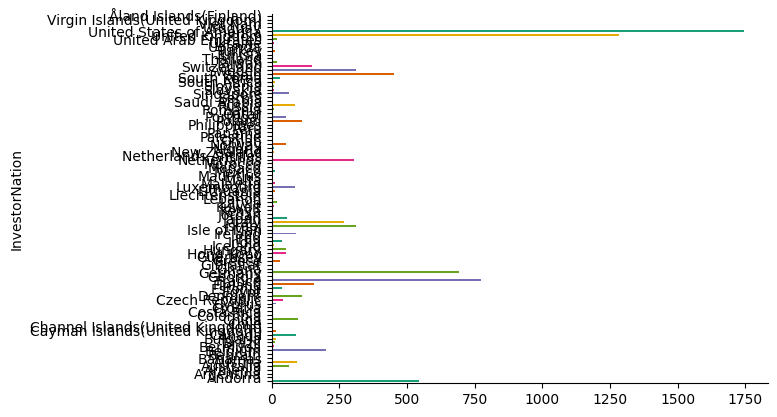

.


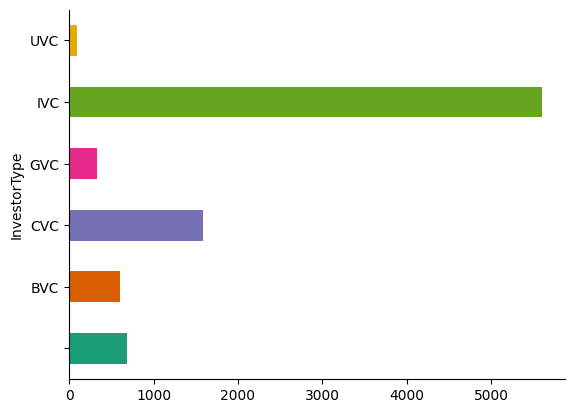

.


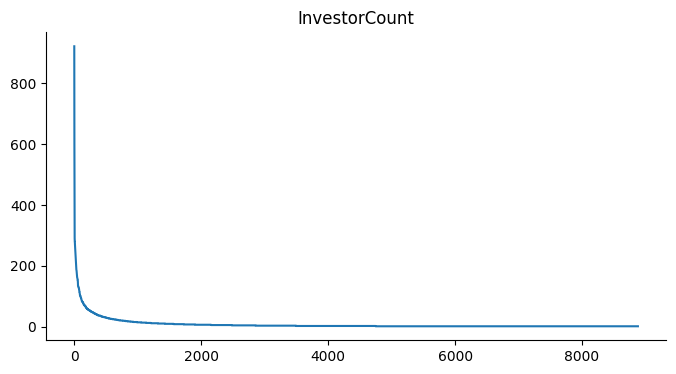

.


In [18]:
df_interesante_1_collapsed.groupby('InvestorNation').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()
print('.')
df_interesante_1_collapsed.groupby('InvestorType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()
print('.')
df_interesante_1_collapsed['InvestorCount'].plot(kind='line', figsize=(8, 4), title='InvestorCount')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()
print('.')

# Modelo 4: Hochberg, Ljungqvist, and Lu (2007).

In [ ]:
akap_pretty_print_df(df_investments, 5)

akap_txt_file_writer(df_investments, 'df_investments')

# Otros

In [ ]:
# Check runtime vars
# dir() keeps trak of the declared variables in the runtime

[var for var in dir() if '_' != var[0]]

In [ ]:
investor_count = df_investments['InvestorID'].value_counts().get('VCInvestor002335', 0)
investor_count